In [66]:
#Packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn import preprocessing
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from pylab import rcParams

In [ ]:
#dill.dump_session('notebook_env.db')

In [ ]:
#dill.load_session('notebook_env.db')

In [2]:
#load data, change directory to your corresponding directories
#tag = pd.read_csv("C:/Users/cos00/Desktop/Nuclear/APAN5900/Tag Data Final.csv")
tag = pd.read_csv('~/Desktop/APAN5900/Tag Data Final.csv')

In [3]:
np.shape(tag) #dimension

(474780, 61)

In [18]:
tag.describe()  #summary of tag data

,MI,P1:FC70104,P1:FC70113,P1:FC70116,P1:FC70117,P1:FC70120,P1:FC70121,P1:FC70302,P1:Fc70302.AOT,P1:FC70309,...,P1:TR70104,P1:TR70105,P1:TR70106,P1:TR70107,P1:TR70108,P1:TR70109,P1:TR70110,P1:TR70111,P1:TR70201,P1:TR70305
count,1920.000000,474780.000000,474780.000000,474780.000000,474780.000000,474780.000000,474780.000000,474780.000000,474780.000000,474780.000000,...,474780.000000,474780.000000,474780.000000,474780.000000,474780.000000,474780.000000,474780.000000,474780.000000,474780.000000,474780.000000
mean,4.566228,42566.267520,90.603056,37534.418031,13756.997247,6971.572492,6791.592072,77032.428407,49.605938,50040.052876,...,179.524201,184.061483,187.022822,187.071296,185.874510,188.214717,187.273341,186.489616,101.527905,95.652222
std,3.263493,10658.907868,108.817466,17638.683105,4896.968277,1653.538575,1637.111213,30418.941971,16.071910,12805.590652,...,16.200895,14.981342,15.233879,14.819217,14.246953,15.047288,14.774859,14.825817,10.125880,10.844265
min,0.630000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.392750,41723.002000,0.999998,28701.608250,9939.597900,6967.669800,6922.981175,61954.540250,44.740993,49086.726000,...,172.277630,180.106905,183.883030,184.119180,183.590360,185.166745,184.636825,183.762910,95.602245,90.484572
50%,3.790000,45703.427500,9.985807,39237.012000,13275.303000,7082.420400,7059.809350,81876.031500,53.564054,52641.004000,...,181.373835,185.875085,188.834525,188.691445,187.391770,189.831160,188.690735,187.792045,101.586830,93.446106
75%,4.430000,48067.617000,179.993150,49363.353250,17846.241000,7520.302400,7453.380625,97682.049000,59.155867,56176.505000,...,187.841037,190.180402,192.664470,192.287678,190.433252,193.394660,192.083102,191.225510,108.302113,101.834185
max,52.880000,54140.277000,854.803280,119999.940000,44732.734000,13357.232000,18000.000000,189885.800000,100.000000,70509.445000,...,249.570950,242.760670,243.768840,250.000000,250.000000,250.000000,244.593190,234.901540,119.902320,136.239580


In [4]:
tag.head()

,Time,ProdGrade,MI,P1:FC70104,P1:FC70113,P1:FC70116,P1:FC70117,P1:FC70120,P1:FC70121,P1:FC70302,...,P1:TR70104,P1:TR70105,P1:TR70106,P1:TR70107,P1:TR70108,P1:TR70109,P1:TR70110,P1:TR70111,P1:TR70201,P1:TR70305
0,9/1/2018 0:01:00,4110N,NaN,38794.609,190.75885,24957.957,14851.066,8557.4453,8234.1465,76234.313,...,188.43633,192.51096,191.25912,195.41490,190.49413,195.98662,191.57228,188.17290,109.82582,93.186417
1,9/1/2018 0:02:00,4110N,NaN,39349.859,211.37585,27914.863,14821.011,8553.7354,8235.4736,76240.289,...,188.38400,192.46667,191.22163,195.39833,190.43701,195.92068,191.54037,188.06023,109.82489,93.182861
2,9/1/2018 0:03:00,4110N,NaN,39299.203,236.44901,26407.764,14790.954,8550.0254,8236.8008,76246.266,...,188.33170,192.42241,191.18413,195.38177,190.37990,195.85475,191.50848,187.94756,109.82396,93.179306
3,9/1/2018 0:04:00,4110N,NaN,39085.840,261.52216,25929.623,14760.897,8546.3154,8238.1279,76252.242,...,188.27939,192.37813,191.14664,195.36520,190.32278,195.78882,191.47658,187.83487,109.82303,93.175743
4,9/1/2018 0:05:00,4110N,NaN,38872.480,286.59531,25934.773,14730.841,8542.6045,8239.4551,76258.227,...,188.22707,192.33385,191.10913,195.34863,190.26567,195.72289,191.44469,187.72220,109.82209,93.172188


In [5]:
sum(tag['MI'].notnull()) #only 1920not null value for MI

1920

In [6]:
#convert time column from string to time
tag['Time'] = [datetime.strptime(x, '%m/%d/%Y %H:%M:%S') for x in tag['Time'] ] 

In [7]:
#extract tag entries with MI value
tag_MI = tag[tag['MI'].notnull()]

In [8]:
tag_MI.head() #glimpse of new tag_MI

,Time,ProdGrade,MI,P1:FC70104,P1:FC70113,P1:FC70116,P1:FC70117,P1:FC70120,P1:FC70121,P1:FC70302,...,P1:TR70104,P1:TR70105,P1:TR70106,P1:TR70107,P1:TR70108,P1:TR70109,P1:TR70110,P1:TR70111,P1:TR70201,P1:TR70305
74,2018-09-01 01:15:00,4110N,2.482,40435.379,383.598210,47088.766,15558.786,8282.9053,8332.35840,87568.805,...,190.37286,185.13597,202.30438,189.00461,182.95929,202.01640,189.25471,192.71117,109.75680,92.923294
194,2018-09-01 03:15:00,4110N,2.309,29355.064,569.562320,42298.676,14737.558,8395.3887,8871.26460,67093.109,...,198.58208,197.01048,200.58246,197.68414,194.01871,198.65259,197.85690,196.75499,109.64487,94.209946
314,2018-09-01 05:15:00,4110N,2.767,33195.844,646.761960,50813.984,14827.622,8649.5732,8482.22850,46701.320,...,203.59085,198.79475,203.05699,203.87950,195.78954,208.12000,201.02373,202.88943,109.53294,102.544490
554,2018-09-01 09:15:00,4110N,2.869,38341.617,4.118267,18272.414,14113.339,8316.7842,231.08179,72439.969,...,187.14247,185.45956,185.50685,190.92581,193.11287,185.80876,189.15814,187.29926,109.30908,98.317741
794,2018-09-01 13:15:00,4110N,2.423,33265.332,205.569700,35992.391,15255.769,9097.5439,985.61017,74585.281,...,185.89648,188.61148,187.57315,191.21040,188.01727,189.25090,185.82840,186.04018,109.08522,98.652260


In [9]:
np.shape(tag_MI) #dimension

(1920, 61)

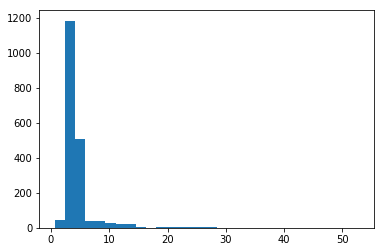

In [11]:
#------exploratory analysis-----------
#plot of MI
plt.hist(tag_MI['MI'], bins = 30)
plt.show()

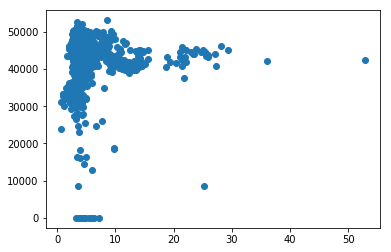

In [12]:
#scatter plot of some variables against MI
plt.scatter(tag_MI['MI'], tag_MI['P1:FC70104'])
plt.show()

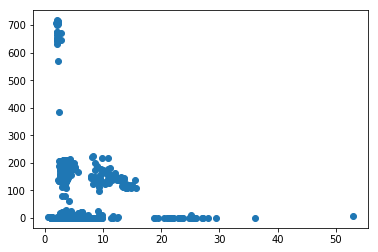

In [13]:
plt.scatter(tag_MI['MI'], tag_MI['P1:FC70113'])
plt.show()

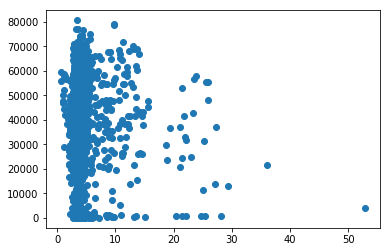

In [14]:
plt.scatter(tag_MI['MI'], tag_MI['P1:FC70116'])
plt.show()

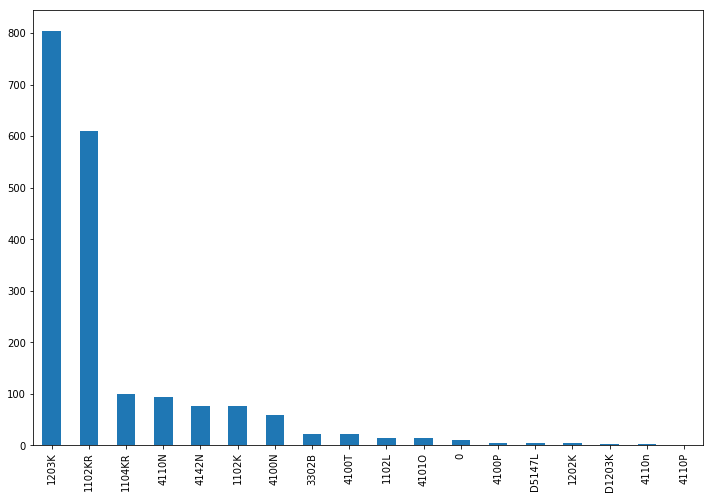

In [10]:
#number of observations for each product grade
fig=plt.gcf()
fig.set_size_inches(12,8)
tag_MI['ProdGrade'].value_counts().plot(kind='bar') #1203K is most dominant product grade
plt.show()

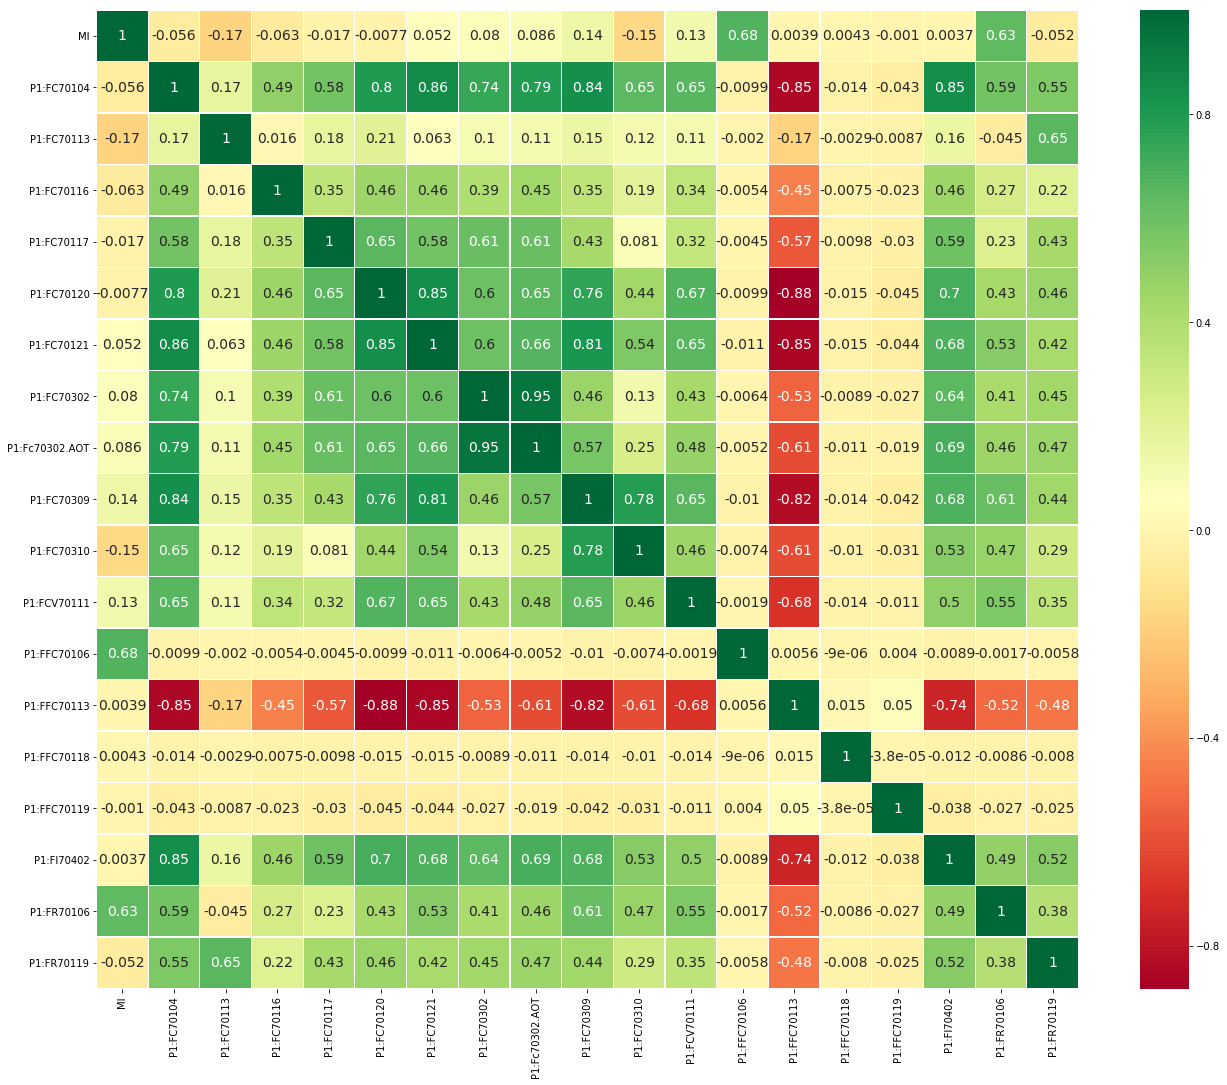

In [27]:
#heat map column 2 to 21
tag_cor1 = tag.iloc[:,2:21]
sns.heatmap(tag_cor1.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':14})
fig=plt.gcf()
fig.set_size_inches(22,18)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

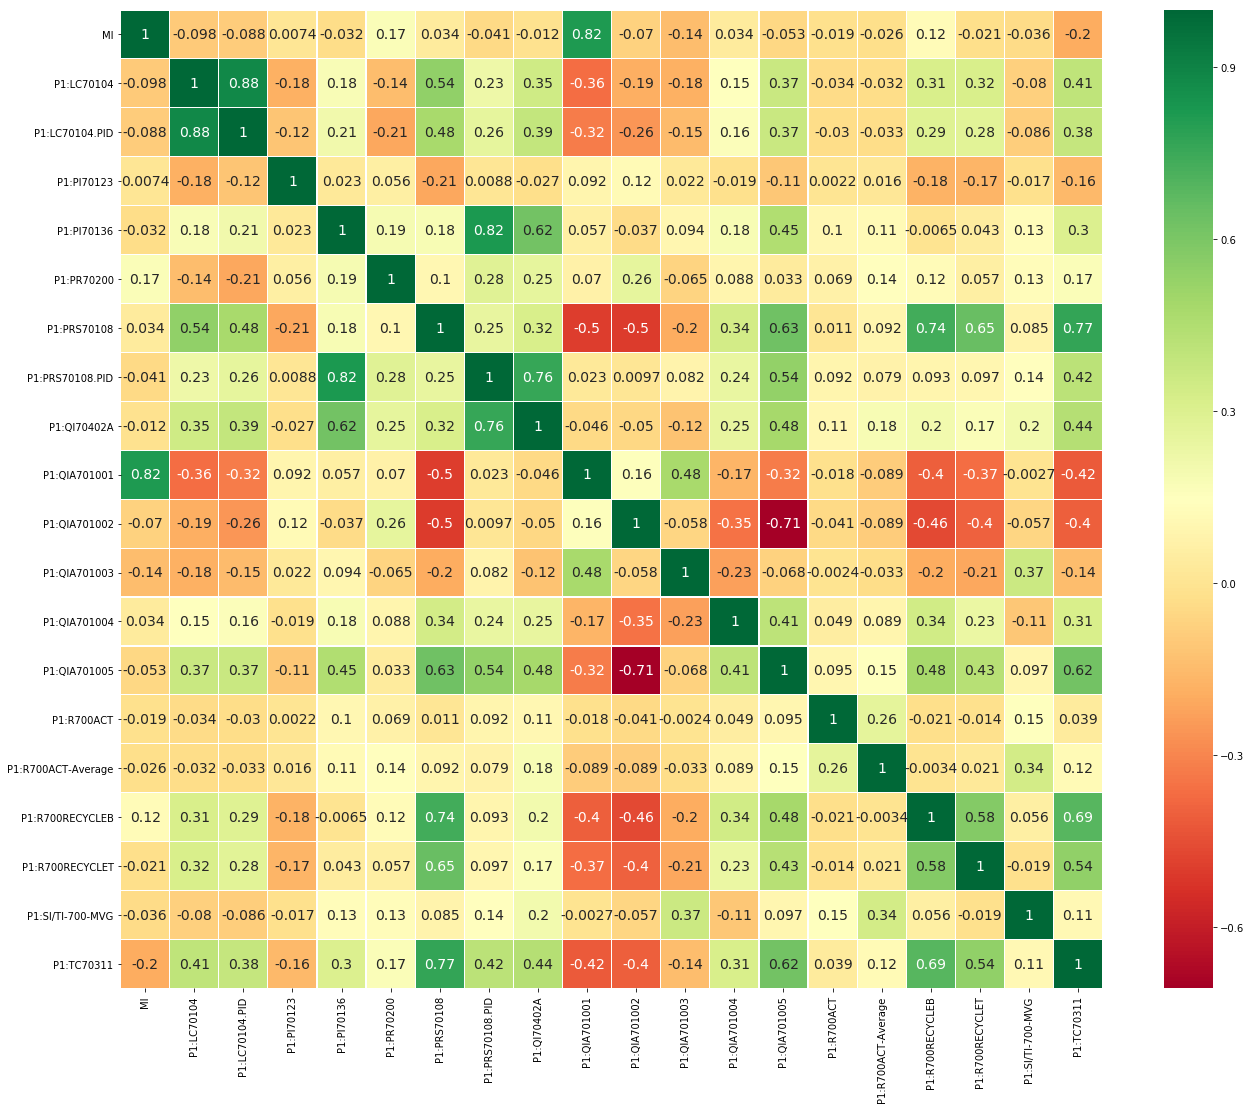

In [32]:
#heat map column 22 to 41
tag_cor2 = tag.iloc[:,np.r_[2, 22:41]]
sns.heatmap(tag_cor2.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':14})
fig=plt.gcf()
fig.set_size_inches(22,18)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

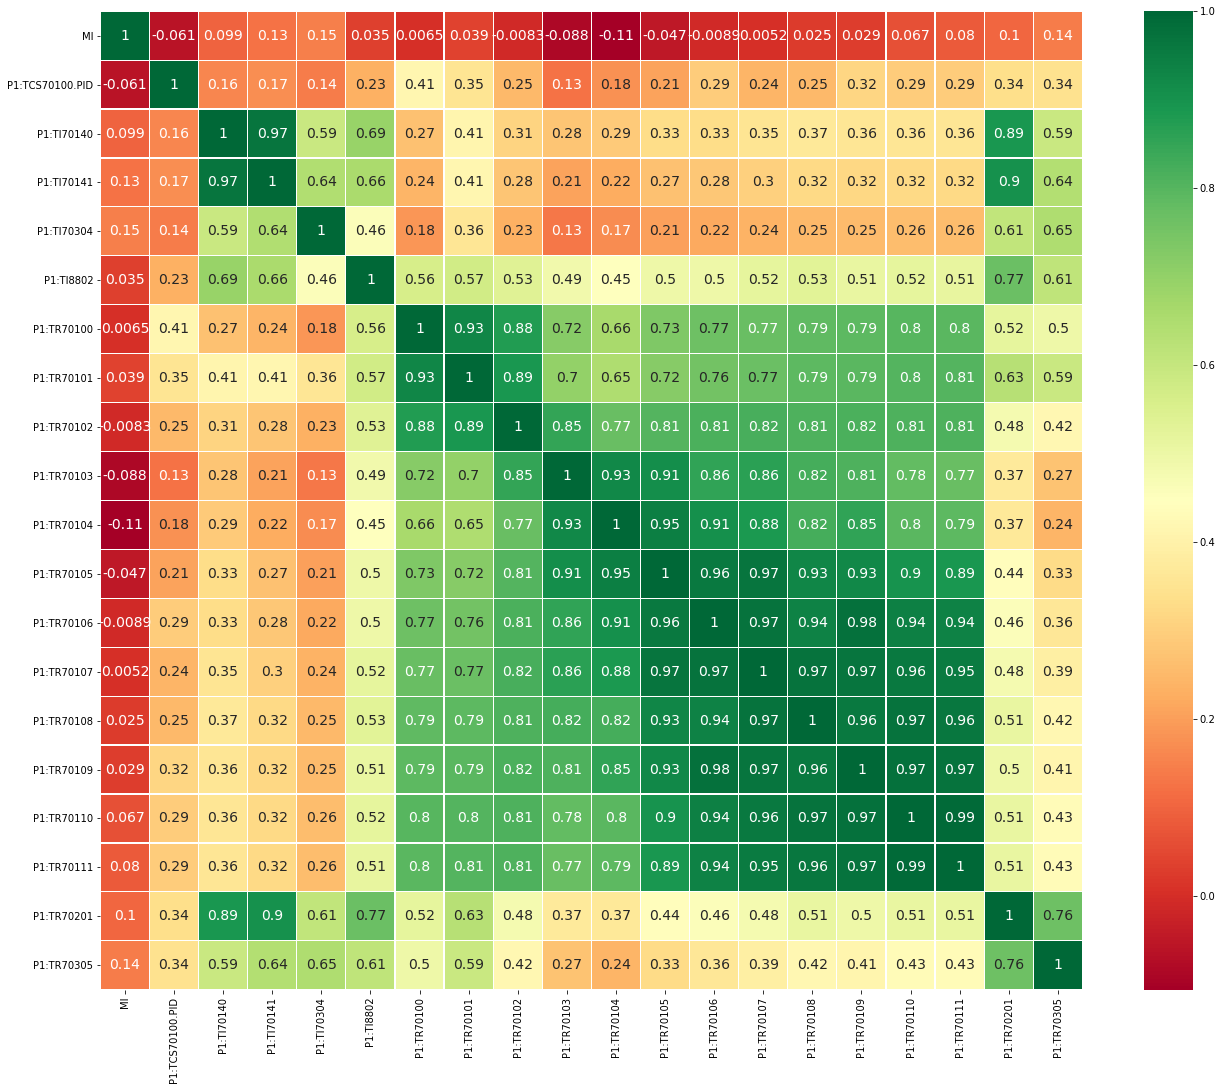

In [33]:
#heat map column 42 to 61
tag_cor3 = tag.iloc[:,np.r_[2, 42:61]]
sns.heatmap(tag_cor3.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':14})
fig=plt.gcf()
fig.set_size_inches(22,18)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

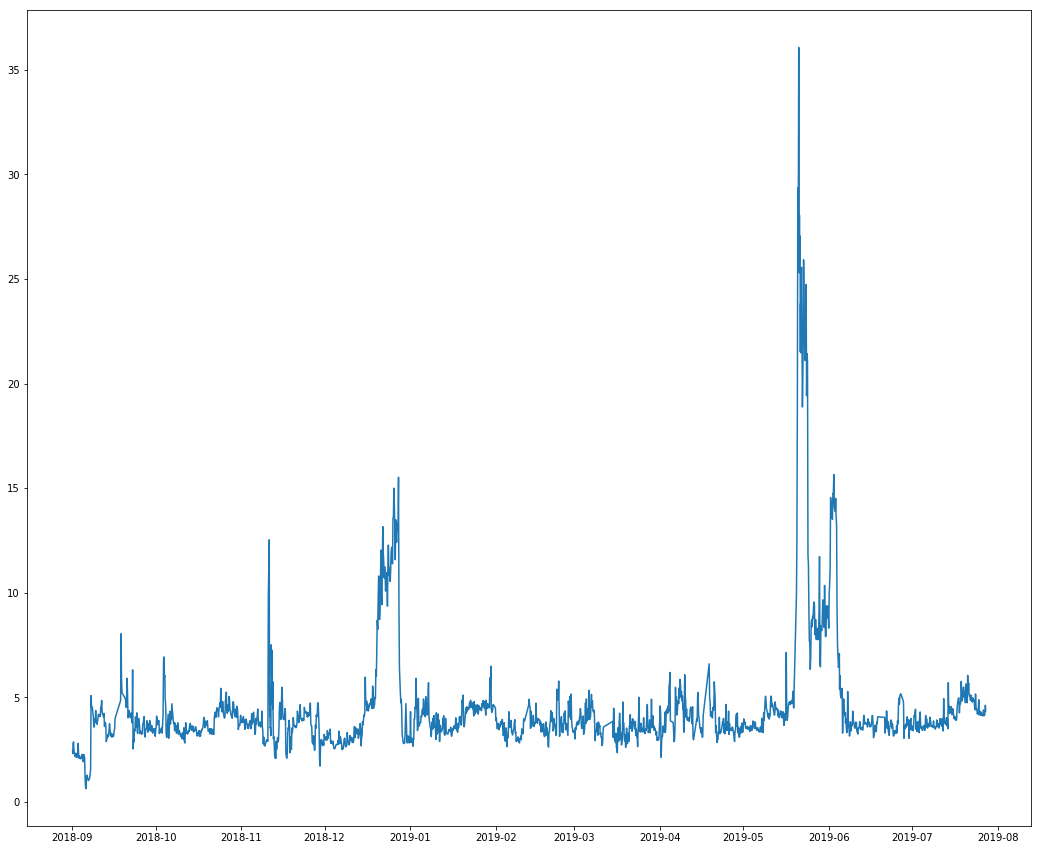

In [32]:
#time series plot of MI value
time = tag_MI['Time']
mi = tag_MI['MI']
plt.plot(time,mi)
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.show()

In [13]:
#take a close look at what is going on at the spike
tag_MI.loc[(tag_MI['Time'] >= '2018-11-10') & (tag_MI['Time'] <= '2018-11-11')] #spike occurs on 2018-11-10 19:45 and 19:45

,Time,ProdGrade,MI,P1:FC70104,P1:FC70113,P1:FC70116,P1:FC70117,P1:FC70120,P1:FC70121,P1:FC70302,...,P1:TR70104,P1:TR70105,P1:TR70106,P1:TR70107,P1:TR70108,P1:TR70109,P1:TR70110,P1:TR70111,P1:TR70201,P1:TR70305
100874,2018-11-10 01:15:00,1203K,2.97,46475.2700,176.931810,28123.68600,18749.71500,7037.4312,7011.3701,85309.266,...,186.70677,186.50652,188.24983,187.24617,180.03395,186.40300,183.66316,181.45036,92.791374,94.638336
101114,2018-11-10 05:15:00,4110N,2.97,46346.6210,21.628223,29025.79100,18901.00200,7018.2705,7017.3569,82140.727,...,189.00365,185.60095,185.43932,184.09941,182.19939,185.88051,184.83891,183.62428,93.198578,94.929642
101354,2018-11-10 09:15:00,4110N,2.90,42287.7770,18.209997,900.33215,18526.22500,6999.1099,7023.3433,75536.891,...,176.13817,182.47607,185.38371,185.13843,185.03802,184.10080,183.82848,178.82095,93.605774,89.911972
101594,2018-11-10 13:15:00,4110N,2.89,44097.8950,14.791770,17765.55300,18942.50800,6755.9136,7037.7886,60146.883,...,184.24754,189.03143,190.14705,188.86131,187.29054,189.50826,187.00124,185.42468,94.012970,91.611137
101834,2018-11-10 17:15:00,1102KR,9.83,40937.5000,11.373544,26527.27000,18931.82000,6410.8667,7163.2456,59682.813,...,192.03362,192.47089,194.03481,192.44615,189.33374,192.02911,190.17398,188.45717,93.905647,93.310310
101984,2018-11-10 19:45:00,1102KR,25.14,8619.5313,9.237152,31289.48000,306.68307,6195.2119,7028.5635,75988.016,...,167.58791,170.81326,181.73859,172.15543,166.10451,180.99265,173.65001,175.47437,93.335960,71.285263
102074,2018-11-10 21:15:00,4100N,52.88,42381.0940,7.955317,3966.98950,13582.05400,7588.7095,8186.2432,39634.031,...,182.53566,187.16055,183.03802,190.57253,187.87384,183.88593,188.33209,187.81702,92.994148,74.011017


In [29]:
#take a close look at what is going on at the spike
tag_MI.loc[(tag_MI['Time'] >= '2019-05-19') & (tag_MI['Time'] <= '2019-06-10')] #it seems like spike occurs in late May

,Time,ProdGrade,MI,P1:FC70104,P1:FC70113,P1:FC70116,P1:FC70117,P1:FC70120,P1:FC70121,P1:FC70302,...,P1:TR70104,P1:TR70105,P1:TR70106,P1:TR70107,P1:TR70108,P1:TR70109,P1:TR70110,P1:TR70111,P1:TR70201,P1:TR70305
374414,2019-05-19 01:15:00,1102KR,5.13,45133.059,0.750000,51401.82000,20289.336,6901.6660,8080.6499,94796.82000,...,165.20303,172.01248,179.33630,182.67892,186.78061,185.41711,189.84369,188.43825,111.31921,116.45943
374654,2019-05-19 05:15:00,1102KR,5.29,45221.402,0.750000,48983.76200,19708.393,7098.1514,7884.8628,90601.14800,...,162.36447,169.06781,183.25114,182.36115,183.20670,182.10234,185.49506,183.42073,111.88939,117.08979
374894,2019-05-19 09:15:00,1102KR,4.49,43551.125,0.750000,28895.21300,20649.041,7294.6362,7689.0762,94297.65600,...,164.22380,174.09869,183.93080,183.89720,189.13577,190.31105,191.75346,191.24541,112.45956,118.25070
376334,2019-05-20 09:15:00,4100P,9.84,18722.439,0.750000,79087.16400,11926.940,7972.1650,6172.3042,525.45471,...,206.51439,199.22592,209.72456,204.56960,197.98845,210.84407,200.70209,205.53836,103.98957,109.52089
376335,2019-05-20 09:16:00,4100P,9.84,18470.016,0.750000,78503.60200,11927.534,7972.3247,6178.2915,534.80322,...,211.29727,200.93590,214.70654,206.47649,198.59970,215.78658,203.01640,208.62534,104.00912,110.44680
376574,2019-05-20 13:15:00,4100P,12.38,38986.461,0.750000,36495.63700,11592.108,8010.5513,7443.8438,86104.20300,...,168.88611,190.73180,203.29384,199.93735,193.90063,206.64522,200.65405,202.20345,108.68261,112.25220
376814,2019-05-20 17:15:00,4100P,18.71,40572.223,0.750000,29701.93200,11824.894,8048.9380,7795.7739,87559.41400,...,167.44279,184.76541,187.42430,187.09775,191.56570,190.34700,196.92006,197.04973,110.00189,113.80434
377054,2019-05-20 21:15:00,4100P,29.36,45096.840,0.750000,13089.56400,19530.801,8087.3247,6631.0176,96009.69500,...,172.43208,189.97859,195.13231,194.99176,186.10950,196.19452,195.36838,195.79150,110.44981,103.94672
377294,2019-05-21 01:15:00,4100T,27.22,40826.922,0.750000,37236.72700,19728.189,8125.7114,7295.1016,95128.41400,...,176.34206,180.77524,188.41653,186.75945,183.28595,190.75356,192.99265,193.72975,110.89773,108.71613
377534,2019-05-21 05:15:00,4100T,36.07,42034.453,0.750000,21587.68800,19724.592,8135.1855,7866.7852,95177.57800,...,168.16827,182.75571,184.82690,186.21626,189.05544,187.49532,195.75021,195.90526,111.34564,109.14731


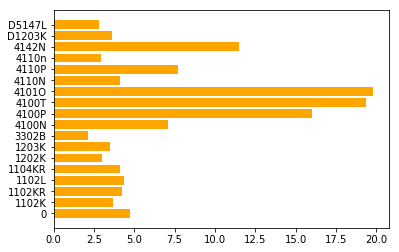

In [12]:
#MI mean value by different progrades
Prograde_MI = tag_MI.groupby(['ProdGrade']).mean() #check mean MI for each Prograde
plt.barh(Prograde_MI.index, Prograde_MI['MI'], color = 'orange')
plt.show()

In [13]:
#The tallest spike is of product 4100N, which has mean MI of 7.5. It is clearly an outlier that needs to be removed.
#second tallest spike is of 1102KR with mean MI of less than 5, remove this as well
#They can be removed since neither of these product grades has too few values
tag_MI = tag_MI[(tag_MI['MI'] != 52.88) & (tag_MI['MI'] != 25.14)]


In [69]:
#----time series analysis------

#preprocesing
tag_Time = tag_MI[['Time', 'MI']]
#tag_Time = tag_Time.groupby('Time')
tag_Time = tag_Time.set_index('Time')
tag_Time.index

DatetimeIndex(['2018-09-01 01:15:00', '2018-09-01 03:15:00',
               '2018-09-01 05:15:00', '2018-09-01 09:15:00',
               '2018-09-01 13:15:00', '2018-09-01 17:15:00',
               '2018-09-01 21:15:00', '2018-09-02 01:15:00',
               '2018-09-02 05:15:00', '2018-09-02 09:15:00',
               ...
               '2019-07-26 13:15:00', '2019-07-26 17:15:00',
               '2019-07-26 21:15:00', '2019-07-27 01:15:00',
               '2019-07-27 05:15:00', '2019-07-27 09:15:00',
               '2019-07-27 10:15:00', '2019-07-27 13:15:00',
               '2019-07-27 14:15:00', '2019-07-27 17:15:00'],
              dtype='datetime64[ns]', name='Time', length=1918, freq=None)

In [77]:
#mean o mi
MI_time = tag_Time['MI'].resample('MS').mean()
MI_time['2018':]

Time
2018-09-01    3.371352
2018-10-01    3.853638
2018-11-01    3.884938
2018-12-01    5.568194
2019-01-01    4.067243
2019-02-01    3.682937
2019-03-01    3.592515
2019-04-01    3.974259
2019-05-01    8.271667
2019-06-01    4.991394
2019-07-01    4.192822
Freq: MS, Name: MI, dtype: float64

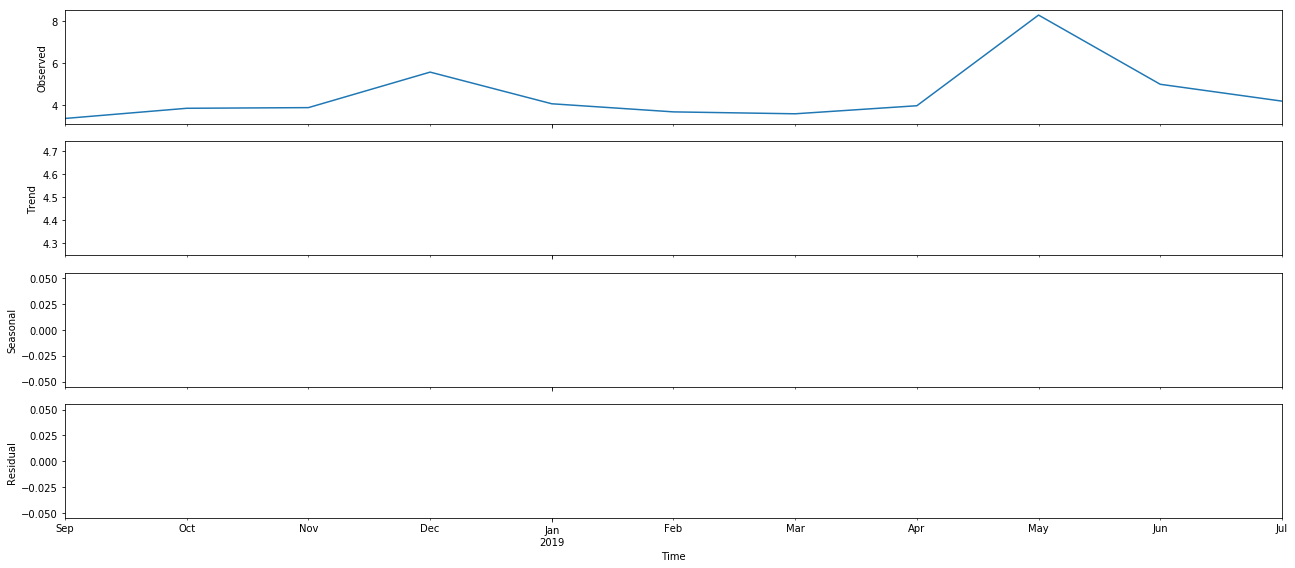

In [82]:
#plot seasonality and residual
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(MI_time, freq = 11, model='additive')
fig = decomposition.plot()
plt.show()

In [14]:
#--------test modeling-----------

#split train and test
train, test = train_test_split(tag_MI, test_size=0.3, random_state=42)


In [15]:
np.shape(train)

(1342, 61)

In [16]:

#pre-processing, use all numeric predicators
X_train = train.drop(["Time", "ProdGrade", "MI"],axis=1)
Y_train = train["MI"]
X_test = test.drop(["Time", "ProdGrade", "MI"],axis=1)

In [17]:
#1. linear model with all predicators
lm_model = LinearRegression().fit(X_train, Y_train)

In [18]:
#check accuracy
lm_model.score(X_train, Y_train) #check r squared value

0.21997385540342718

In [19]:
#check coefficient
lm_model.coef_

array([ -1.46236750e-04,  -2.46046647e-03,  -4.70873726e-05,
        -4.79705156e-06,  -6.42752250e-04,  -2.23355549e-04,
        -2.68456538e-06,  -5.68169208e-05,   1.57574081e-04,
        -4.21788901e-04,   1.51186549e-03,   2.08881677e-05,
         0.00000000e+00,   3.59087480e-07,  -3.15491990e-15,
        -1.41660927e-06,   2.74207741e-06,  -8.83223454e-05,
         4.98858682e-05,   5.02346848e-06,  -1.62160423e-05,
        -4.45270186e-07,   5.51078564e-05,   3.33012350e-05,
         4.29514438e-05,  -1.33812507e-05,   1.81909372e-06,
         6.10578028e-07,   9.31885173e-07,  -5.11111156e-06,
         1.76380909e-06,   7.57986776e-06,  -5.23254321e-06,
        -9.84085289e-05,  -2.73582595e-05,   3.27499286e-06,
        -3.92935014e-05,  -1.80949531e-05,   2.30774475e-05,
        -1.10698274e-06,   1.92666112e-06,   1.99424877e-05,
         5.52699839e-05,   8.75239400e-06,   1.18073763e-05,
         1.98572037e-05,   4.10325904e-06,  -5.39517364e-05,
        -4.47547017e-05,

In [20]:
#predict
MI_lm = lm_model.predict(X_test)

In [21]:
#check rmse
mean_squared_error(test['MI'], MI_lm)

6.798460386712291

In [22]:
#2. linear model with some predicators (coef >= abs(0.1))
predicators_used = ['P1:FC70113','P1:FC70310','P1:FFC70106','P1:FR70106','P1:QIA701001', 'P1:PR70200', 'P1:R700RECYCLEB', 
                     'P1:TI70141', 'P1:TI70304','P1:TR70104','P1:TR70201','P1:TR70305']
X_train_lm = X_train[predicators_used]
X_test_lm = X_test[predicators_used]
lm_model2 = LinearRegression().fit(X_train_lm, Y_train)

In [23]:
#check accuracy
lm_model2.score(X_train_lm, Y_train) #check r squared value

0.78955156978105523

In [24]:
#predict
MI_lm2 = lm_model2.predict(X_test_lm)
#check rmse
mean_squared_error(test['MI'], MI_lm2)

3.1868362712357281

In [25]:
#3. Linear model with some predicators plus their interactions
tag_cor = tag.corr() #all correlations
tag_cor = tag_cor[predicators_used].loc[predicators_used] #subset ronly predictors we used (>= |0.2|)


In [26]:
tag_cor

,P1:FC70113,P1:FC70310,P1:FFC70106,P1:FR70106,P1:QIA701001,P1:PR70200,P1:R700RECYCLEB,P1:TI70141,P1:TI70304,P1:TR70104,P1:TR70201,P1:TR70305
P1:FC70113,1.000000,0.116176,-0.002029,-0.044696,-0.105354,-0.036022,0.133367,0.110935,-0.016444,0.282501,0.145013,0.059897
P1:FC70310,0.116176,1.000000,-0.007358,0.471858,-0.355809,0.004131,0.359428,-0.343570,-0.381332,0.056019,-0.094709,0.098871
P1:FFC70106,-0.002029,-0.007358,1.000000,-0.001688,-0.000690,-0.001267,-0.008531,0.000253,-0.001021,0.006705,0.000391,-0.004745
P1:FR70106,-0.044696,0.471858,-0.001688,1.000000,-0.230694,0.191080,0.530367,-0.022406,0.022899,-0.068408,0.164893,0.317420
P1:QIA701001,-0.105354,-0.355809,-0.000690,-0.230694,1.000000,0.070099,-0.400845,-0.034352,-0.003525,-0.095245,-0.196995,-0.189988
P1:PR70200,-0.036022,0.004131,-0.001267,0.191080,0.070099,1.000000,0.124475,0.288375,0.373066,0.133674,0.340087,0.418614
P1:R700RECYCLEB,0.133367,0.359428,-0.008531,0.530367,-0.400845,0.124475,1.000000,0.326777,0.278646,0.085852,0.505207,0.502111
P1:TI70141,0.110935,-0.343570,0.000253,-0.022406,-0.034352,0.288375,0.326777,1.000000,0.641927,0.223124,0.901277,0.641464
P1:TI70304,-0.016444,-0.381332,-0.001021,0.022899,-0.003525,0.373066,0.278646,0.641927,1.000000,0.168339,0.609286,0.649975
P1:TR70104,0.282501,0.056019,0.006705,-0.068408,-0.095245,0.133674,0.085852,0.223124,0.168339,1.000000,0.367651,0.241649


In [27]:
#print interactions
for index, row in tag_cor.iterrows():
    colinear = row[(row >= abs(0.4)) & (row < 1)]
    print(index + ": ")
    print(colinear.index)
            

P1:FC70113: 
Index([], dtype='object')
P1:FC70310: 
Index(['P1:FR70106'], dtype='object')
P1:FFC70106: 
Index([], dtype='object')
P1:FR70106: 
Index(['P1:FC70310', 'P1:R700RECYCLEB'], dtype='object')
P1:QIA701001: 
Index([], dtype='object')
P1:PR70200: 
Index(['P1:TR70305'], dtype='object')
P1:R700RECYCLEB: 
Index(['P1:FR70106', 'P1:TR70201', 'P1:TR70305'], dtype='object')
P1:TI70141: 
Index(['P1:TI70304', 'P1:TR70201', 'P1:TR70305'], dtype='object')
P1:TI70304: 
Index(['P1:TI70141', 'P1:TR70201', 'P1:TR70305'], dtype='object')
P1:TR70104: 
Index([], dtype='object')
P1:TR70201: 
Index(['P1:R700RECYCLEB', 'P1:TI70141', 'P1:TI70304', 'P1:TR70305'], dtype='object')
P1:TR70305: 
Index(['P1:PR70200', 'P1:R700RECYCLEB', 'P1:TI70141', 'P1:TI70304',
       'P1:TR70201'],
      dtype='object')


In [28]:
#combine interactions to our column
tag_MI_int = tag_MI
tag_MI_int['P1:FC70310 x P1:FR70106'] = tag_MI_int['P1:FC70310'] * tag_MI_int['P1:FR70106']
tag_MI_int['P1:PR70200 x P1:TR70305'] = tag_MI_int['P1:PR70200'] * tag_MI_int['P1:TR70305']
tag_MI_int['P1:R700RECYCLEB x P1:FR70106'] = tag_MI_int['P1:R700RECYCLEB'] * tag_MI_int['P1:FR70106']
tag_MI_int['P1:R700RECYCLEB x P1:TR70201'] = tag_MI_int['P1:R700RECYCLEB'] * tag_MI_int['P1:TR70201']
tag_MI_int['P1:R700RECYCLEB x P1:TR70305'] = tag_MI_int['P1:R700RECYCLEB'] * tag_MI_int['P1:TR70305']
tag_MI_int['P1:TI70141 x P1:TI70304'] = tag_MI_int['P1:TI70141'] * tag_MI_int['P1:TI70304']
tag_MI_int['P1:TI70141 x P1:TR70201'] = tag_MI_int['P1:TI70141'] * tag_MI_int['P1:TR70201']
tag_MI_int['P1:TI70141 x P1:TR70305'] = tag_MI_int['P1:TI70141'] * tag_MI_int['P1:TR70305']  
tag_MI_int['P1:TI70304 x P1:TR70201'] = tag_MI_int['P1:TI70304'] * tag_MI_int['P1:TR70201'] 
tag_MI_int['P1:TI70304 x P1:TR70305'] = tag_MI_int['P1:TI70304'] * tag_MI_int['P1:TR70305'] 
tag_MI_int['P1:TR70201 x P1:TR70305'] = tag_MI_int['P1:TR70201'] * tag_MI_int['P1:TR70305']

In [29]:
#modeling
interactions_used = ['P1:FC70310 x P1:FR70106','P1:PR70200 x P1:TR70305','P1:R700RECYCLEB x P1:FR70106','P1:R700RECYCLEB x P1:TR70201',
                    'P1:R700RECYCLEB x P1:TR70305','P1:TI70141 x P1:TI70304','P1:TI70141 x P1:TR70201','P1:TI70141 x P1:TR70305',
                    'P1:TI70304 x P1:TR70201','P1:TI70304 x P1:TR70305','P1:TR70201 x P1:TR70305']
#preprocess
train_int, test_int = train_test_split(tag_MI_int, test_size=0.3, random_state=42)
X_train_int = train_int.drop(["Time", "ProdGrade", "MI"],axis=1)
Y_train_int = train_int["MI"]
X_test_int = test_int.drop(["Time", "ProdGrade", "MI"],axis=1)
X_train_int_lm = X_train_int[predicators_used + interactions_used]
X_test_int_lm = X_test_int[predicators_used + interactions_used]
#model
lm_model3 = LinearRegression().fit(X_train_int_lm, Y_train_int)

In [30]:
#check accuracy
lm_model3.score(X_train_int_lm, Y_train_int) #check r squared value

0.83590754602965078

In [31]:
#predict
MI_lm3 = lm_model3.predict(X_test_int_lm)
#check rmse
mean_squared_error(test_int['MI'], MI_lm3)

2.3747761561423246

In [67]:
#4. linear regression with normalization
X_train_norm = preprocessing.normalize(X_train_int_lm)
lm_model4 = LinearRegression().fit(X_train_norm, Y_train_int)
#check accuracy
lm_model4.score(X_train_norm, Y_train_int) #check r squared value

0.66552290038364237

In [68]:
#5. linear regression with standardize
X_train_scale = preprocessing.scale(X_train_int_lm)
lm_model5 = LinearRegression().fit(X_train_scale, Y_train_int)
#check accuracy
lm_model5.score(X_train_scale, Y_train_int) #check r squared value

0.83590754602965078

In [59]:
#5. random forest
random_forest = RandomForestRegressor(n_estimators=500)
random_forest.fit(X_train, Y_train)
random_forest.score(X_train, Y_train)


0.9889996076017844

In [60]:
#checkaccuracy
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

98.900000000000006

In [61]:
#predict
MI_rf = random_forest.predict(X_test)

In [62]:
#check rmse
mean_squared_error(test['MI'], MI_rf)

0.84235564312181821

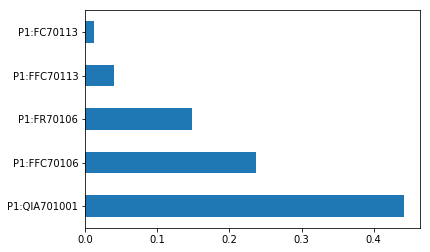

In [63]:
#importance plot
feat_importances = pd.Series(random_forest.feature_importances_, index=X_train.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [64]:
#6. random forest with selected variables from importance plot 
X_train_rm = X_train[['P1:FFC70113', 'P1:FR70106','P1:FFC70106','P1:QIA701001','P1:FC70113']]
X_test_rm = X_test[['P1:FFC70113', 'P1:FR70106','P1:FFC70106','P1:QIA701001','P1:FC70113']]
random_forest.fit(X_train_rm, Y_train)
acc_random_forest = round(random_forest.score(X_train_rm, Y_train) * 100, 2)
acc_random_forest

98.659999999999997

In [65]:
#predict
MI_rf2 = random_forest.predict(X_test_rm)
#check rmse
mean_squared_error(test['MI'], MI_rf2)

0.83795488409555008

In [92]:
#print predicted value and true value
#np.concatenate([test['MI'], MI_rf2] )
pred_round = pd.DataFrame(list(np.round(MI_rf2,1)), round(test['MI'],1))
pred_round.columns = ['predicted']
np.shape(pred_round.loc[pred_round['predicted'] == pred_round.index])[0]/(np.shape(test)[0])

0.07291666666666667

In [97]:
#7. random forest with standardization
X_train_scale = preprocessing.scale(X_train_rm)
X_test_scale = preprocessing.scale(X_test_rm)
random_forest.fit(X_train_scale, Y_train)
acc_random_forest = round(random_forest.score(X_train_scale, Y_train) * 100, 2)
acc_random_forest

/Users/conggeorgesun/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:164: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


98.760000000000005

In [98]:
#predict
MI_rf3 = random_forest.predict(X_test_scale)
#check rmse
mean_squared_error(test['MI'], MI_rf3)

1.2098231797523527